<a href="https://colab.research.google.com/github/veyselalevcan/Federated-Learning-and-Generative-AI/blob/main/BATADAL_Data_FL_Wgan_compare_result_other_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATETIME  2089 non-null   object 
 1   L_T1      2089 non-null   float64
 2   L_T2      2089 non-null   float64
 3   L_T3      2089 non-null   float64
 4   L_T4      2089 non-null   float64
 5   L_T5      2089 non-null   float64
 6   L_T6      2089 non-null   float64
 7   L_T7      2089 non-null   float64
 8   F_PU1     2089 non-null   float64
 9   S_PU1     2089 non-null   float64
 10  F_PU2     2089 non-null   float64
 11  S_PU2     2089 non-null   float64
 12  F_PU3     2089 non-null   float64
 13  S_PU3     2089 non-null   float64
 14  F_PU4     2089 non-null   float64
 15  S_PU4     2089 non-null   float64
 16  F_PU5     2089 non-null   float64
 17  S_PU5     2089 non-null   float64
 18  F_PU6     2089 non-null   float64
 19  S_PU6     2089 non-null   float64
 20  F_PU7     2

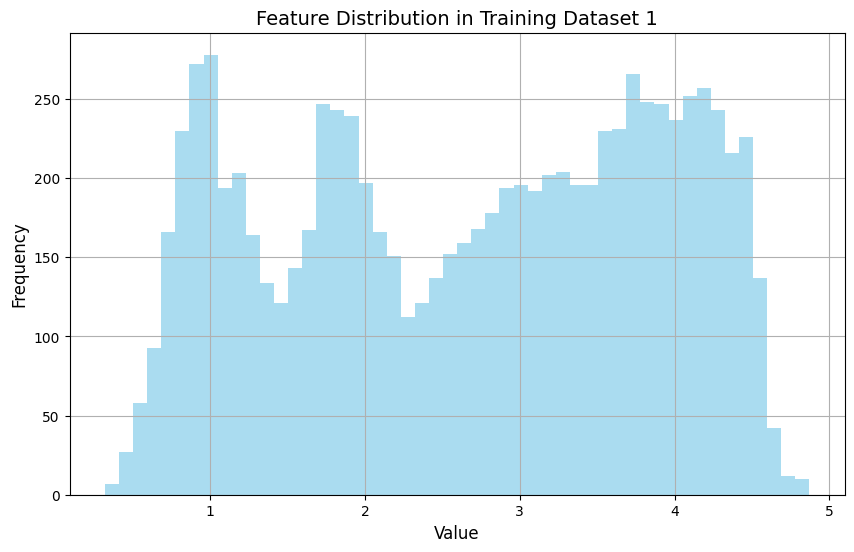

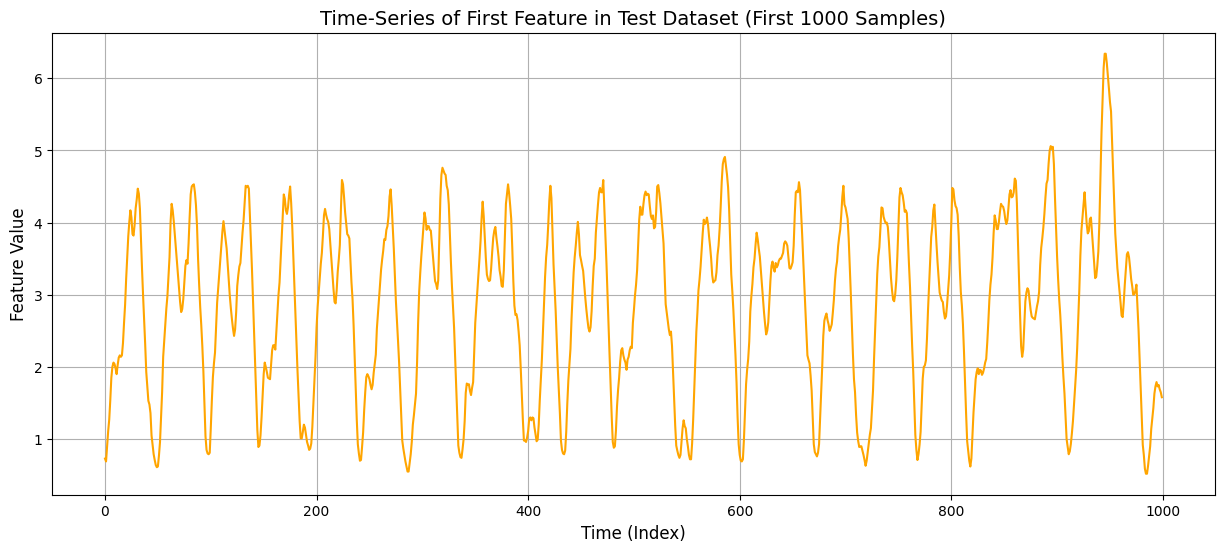

<ipython-input-8-f6b66d050a1f>:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_dataset_2['DATETIME'] = pd.to_datetime(training_dataset_2['DATETIME'], errors='coerce')


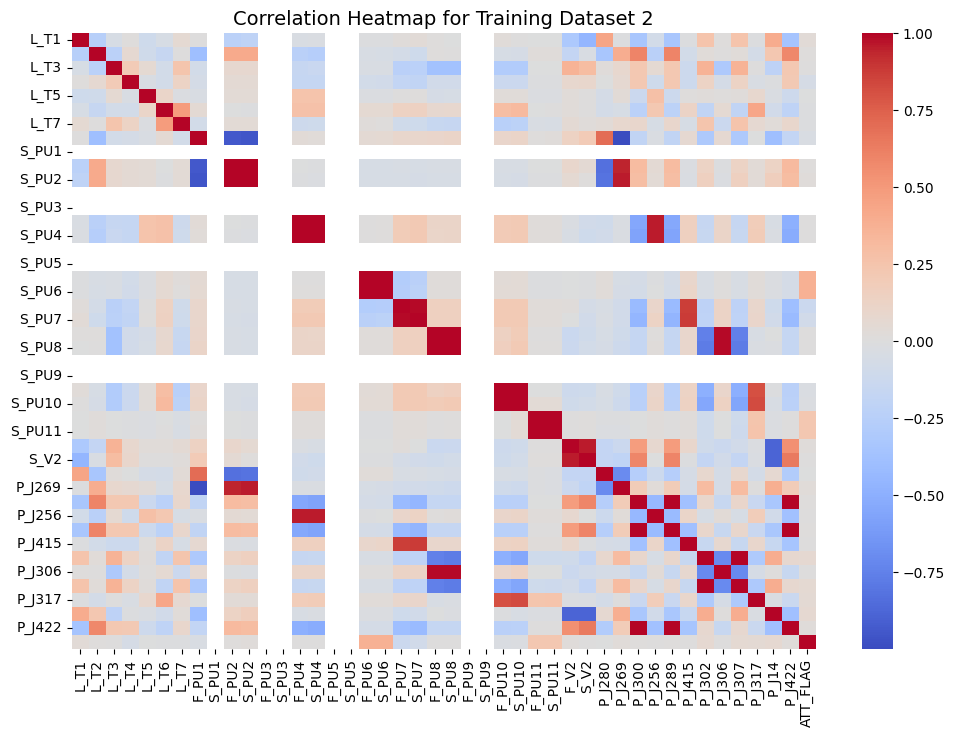

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
test_dataset = pd.read_csv('/content/test_dataset.csv')
training_dataset_1 = pd.read_csv('/content/training_dataset_1.csv')
training_dataset_2 = pd.read_csv('/content/training_dataset_2.csv')

training_data = pd.concat([training_dataset_1, training_dataset_2], ignore_index=True)
training_data.to_csv('/content/training_data.csv', index=False)

# Display basic information about the datasets
print("Test Dataset Info:")
print(test_dataset.info())
print("\nTraining Dataset 1 Info:")
print(training_dataset_1.info())
print("\nTraining Dataset 2 Info:")
print(training_dataset_2.info())

# Display basic statistics
print("\nTest Dataset Description:")
print(test_dataset.describe())
print("\nTraining Dataset 1 Description:")
print(training_dataset_1.describe())
print("\nTraining Dataset 2 Description:")
print(training_dataset_2.describe())

# Visualizations

# 1. Plotting the distribution of a key feature from training_dataset_1
plt.figure(figsize=(10, 6))
training_dataset_1.iloc[:, 1].plot(kind='hist', bins=50, color='skyblue', alpha=0.7)
plt.title('Feature Distribution in Training Dataset 1', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# 2. Time-series plot of the first feature in test_dataset
plt.figure(figsize=(15, 6))
test_dataset.iloc[:, 1][:1000].plot(color='orange')
plt.title('Time-Series of First Feature in Test Dataset (First 1000 Samples)', fontsize=14)
plt.xlabel('Time (Index)', fontsize=12)
plt.ylabel('Feature Value', fontsize=12)
plt.grid(True)
plt.show()

# 3. Preprocessing to handle the datetime column and ensure numeric data for correlation
training_dataset_2['DATETIME'] = pd.to_datetime(training_dataset_2['DATETIME'], errors='coerce')
training_dataset_2_numeric = training_dataset_2.drop(columns=['DATETIME'])

# Generate the correlation matrix and plot the heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = training_dataset_2_numeric.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap for Training Dataset 2', fontsize=14)
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


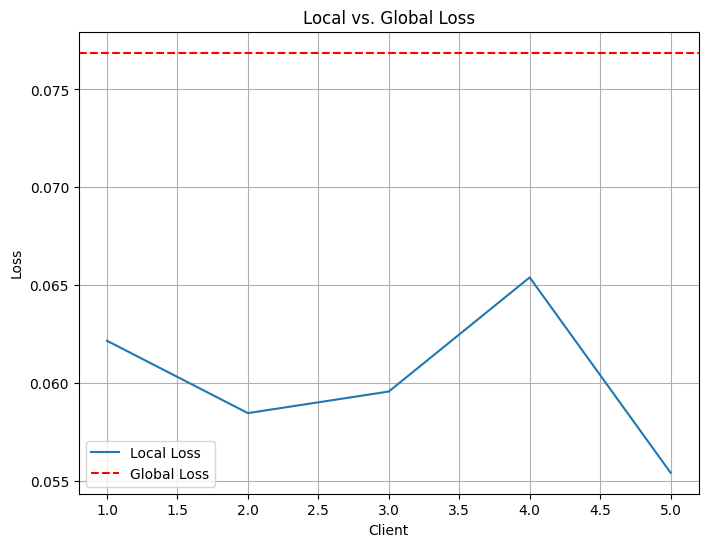

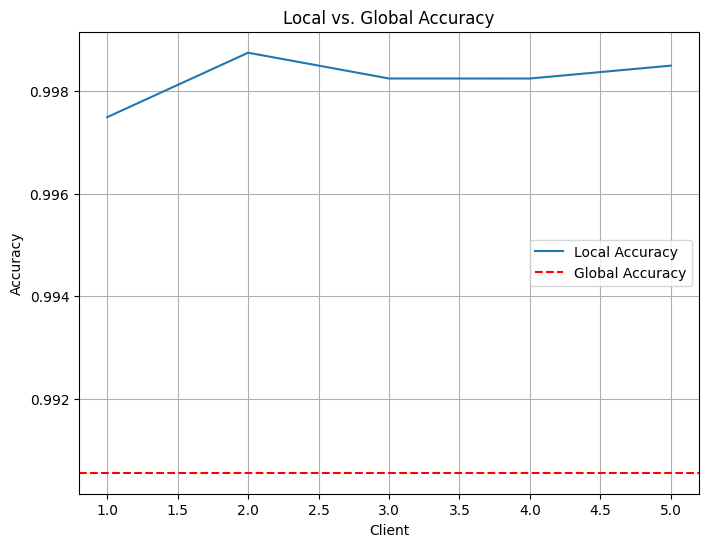

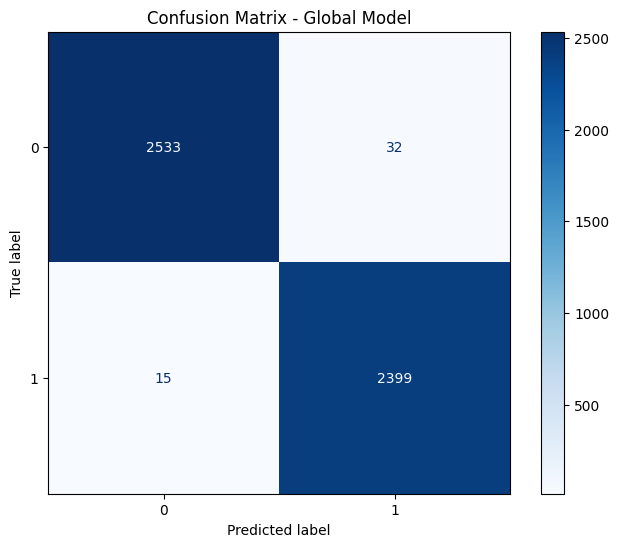

Global Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2565
           1       0.99      0.99      0.99      2414

    accuracy                           0.99      4979
   macro avg       0.99      0.99      0.99      4979
weighted avg       0.99      0.99      0.99      4979

Global Model Accuracy: 0.9905603534846354
Global Model Loss: 0.07687507912477186
Average Local Accuracy: 0.9982423668244484
Average Local Loss: 0.06019971513699875


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# Combine the training datasets
training_data = pd.concat([training_dataset_1, training_dataset_2], ignore_index=True)

# Preprocessing: Separate features and target
X = training_data.drop(columns=['DATETIME', 'ATT_FLAG'])
y = training_data['ATT_FLAG']

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split the balanced dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Split training data into 5 clients for Hierarchical FL
clients_data = np.array_split(X_train, 5)
clients_labels = np.array_split(y_train, 5)

# Initialize lists to track local metrics
local_accuracies = []
local_losses = []

# Train local models
local_models = []
for client_X, client_y in zip(clients_data, clients_labels):
    local_model = RandomForestClassifier(n_estimators=10, random_state=42)
    local_model.fit(client_X, client_y)
    local_models.append(local_model)

    # Evaluate local model
    y_pred_local = local_model.predict(client_X)
    loss_local = log_loss(client_y, local_model.predict_proba(client_X))
    acc_local = accuracy_score(client_y, y_pred_local)

    local_accuracies.append(acc_local)
    local_losses.append(loss_local)

# Aggregate local models into a global model
global_model = RandomForestClassifier(n_estimators=50, random_state=42)
global_model.fit(X_train, y_train)

# Evaluate the global model
y_pred_global = global_model.predict(X_test)
global_loss = log_loss(y_test, global_model.predict_proba(X_test))
global_accuracy = accuracy_score(y_test, y_pred_global)

# Generate confusion matrix for global model
cm_global = confusion_matrix(y_test, y_pred_global)
disp_global = ConfusionMatrixDisplay(confusion_matrix=cm_global, display_labels=np.unique(y_test))

# Results Visualization

# 1. Local vs Global Loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(local_losses) + 1), local_losses, label='Local Loss')
plt.axhline(y=global_loss, color='r', linestyle='--', label='Global Loss')
plt.title('Local vs. Global Loss')
plt.xlabel('Client')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. Local vs Global Accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(local_accuracies) + 1), local_accuracies, label='Local Accuracy')
plt.axhline(y=global_accuracy, color='r', linestyle='--', label='Global Accuracy')
plt.title('Local vs. Global Accuracy')
plt.xlabel('Client')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 3. Confusion Matrix for Global Model
plt.figure(figsize=(8, 6))
disp_global.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix - Global Model')
plt.show()

# 4. Detailed Classification Report for Global Model
print("Global Model Classification Report:")
print(classification_report(y_test, y_pred_global))

# Display final results
print(f"Global Model Accuracy: {global_accuracy}")
print(f"Global Model Loss: {global_loss}")
print(f"Average Local Accuracy: {np.mean(local_accuracies)}")
print(f"Average Local Loss: {np.mean(local_losses)}")

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


No more data available for client 2.


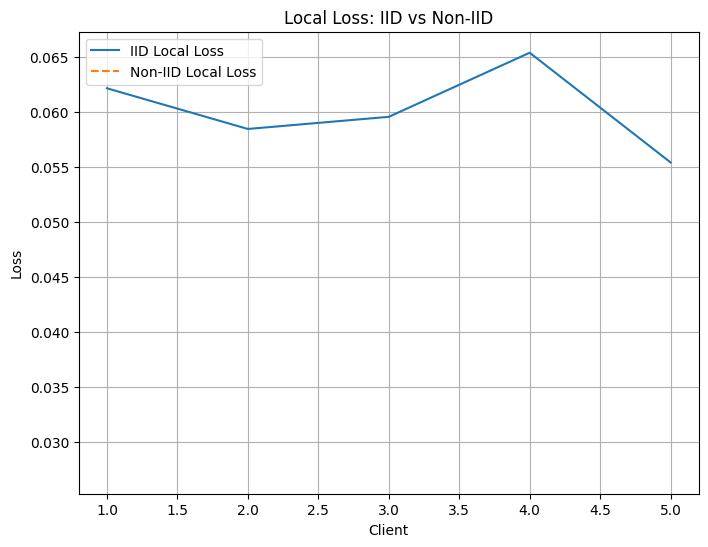

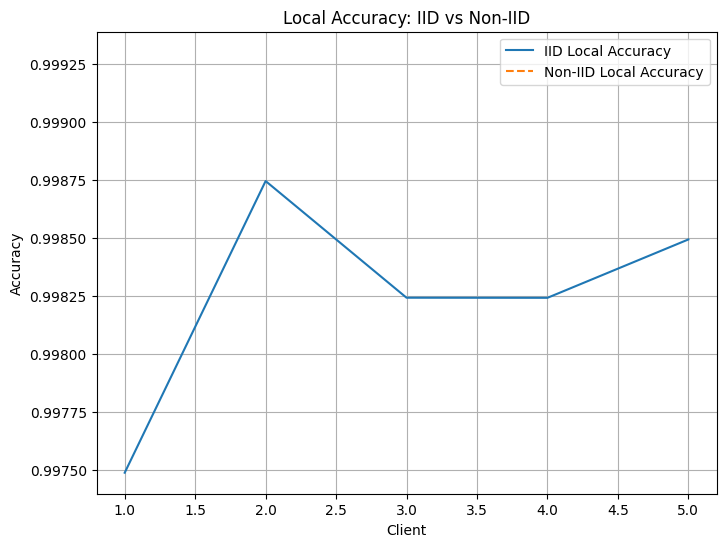

<Figure size 800x600 with 0 Axes>

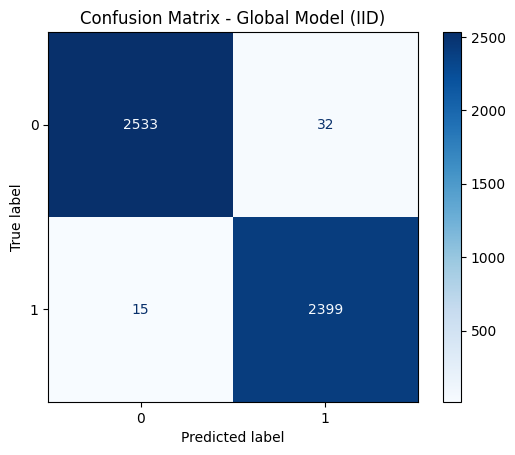

<Figure size 800x600 with 0 Axes>

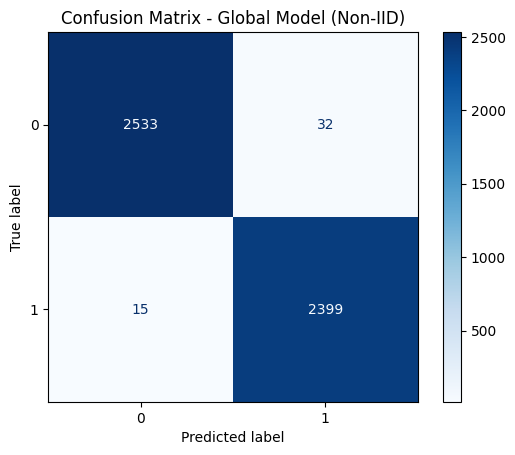

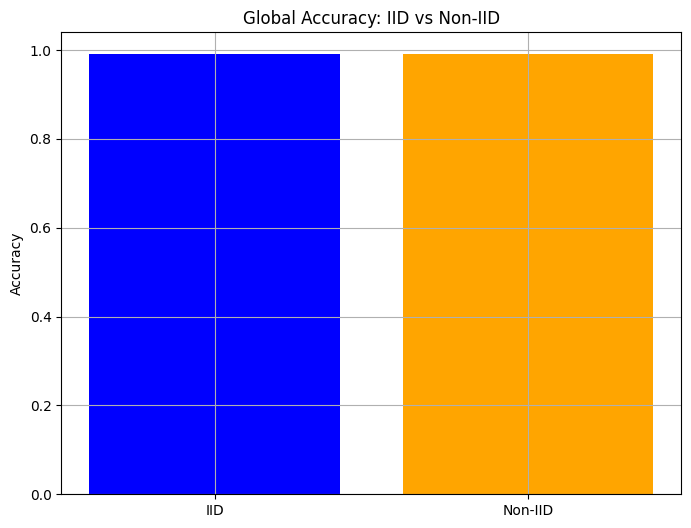

Global Model Classification Report (IID):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2565
           1       0.99      0.99      0.99      2414

    accuracy                           0.99      4979
   macro avg       0.99      0.99      0.99      4979
weighted avg       0.99      0.99      0.99      4979

Global Model Classification Report (Non-IID):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2565
           1       0.99      0.99      0.99      2414

    accuracy                           0.99      4979
   macro avg       0.99      0.99      0.99      4979
weighted avg       0.99      0.99      0.99      4979

IID Global Accuracy: 0.9905603534846354, Loss: 0.07687507912477186
Non-IID Global Accuracy: 0.9905603534846354, Loss: 0.07687507912477186


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Combine the training datasets
training_data = pd.concat([training_dataset_1, training_dataset_2], ignore_index=True)

# Preprocessing: Separate features and target
X = training_data.drop(columns=['DATETIME', 'ATT_FLAG'])
y = training_data['ATT_FLAG']

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split the balanced dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Function to create Non-IID client data
def create_non_iid_clients(X, y, num_clients=5):
    client_data = []
    classes = y.unique()
    available_X, available_y = X.copy(), y.copy()

    for i in range(num_clients):
        if available_X.empty:
            print(f"No more data available for client {i+1}.")
            break

        class_subset = np.random.choice(classes, size=min(len(classes), 2), replace=False)
        mask = available_y.isin(class_subset)

        client_X, client_y = available_X[mask], available_y[mask]
        available_X, available_y = available_X[~mask], available_y[~mask]

        client_data.append((client_X, client_y))

    return client_data

# Create IID client data
clients_data_iid = np.array_split(X_train, 5)
clients_labels_iid = np.array_split(y_train, 5)

# Create Non-IID client data
non_iid_clients = create_non_iid_clients(X_train, y_train)

# Helper function to train local models
def train_local_models(clients_data, clients_labels):
    local_models = []
    local_accuracies = []
    local_losses = []
    for client_X, client_y in zip(clients_data, clients_labels):
        local_model = RandomForestClassifier(n_estimators=10, random_state=42)
        local_model.fit(client_X, client_y)
        local_models.append(local_model)

        # Evaluate local model
        y_pred_local = local_model.predict(client_X)
        loss_local = log_loss(client_y, local_model.predict_proba(client_X))
        acc_local = accuracy_score(client_y, y_pred_local)

        local_accuracies.append(acc_local)
        local_losses.append(loss_local)
    return local_models, local_accuracies, local_losses

# Train local models for IID data
local_models_iid, local_accuracies_iid, local_losses_iid = train_local_models(clients_data_iid, clients_labels_iid)

# Train local models for Non-IID data
non_iid_clients_data = [data[0] for data in non_iid_clients]
non_iid_clients_labels = [data[1] for data in non_iid_clients]
local_models_non_iid, local_accuracies_non_iid, local_losses_non_iid = train_local_models(non_iid_clients_data, non_iid_clients_labels)

# Train global model
global_model_iid = RandomForestClassifier(n_estimators=50, random_state=42)
global_model_iid.fit(X_train, y_train)

# Evaluate the global model for IID data
y_pred_global_iid = global_model_iid.predict(X_test)
global_loss_iid = log_loss(y_test, global_model_iid.predict_proba(X_test))
global_accuracy_iid = accuracy_score(y_test, y_pred_global_iid)

# Train and evaluate global model for Non-IID
global_model_non_iid = RandomForestClassifier(n_estimators=50, random_state=42)
global_model_non_iid.fit(X_train, y_train)
y_pred_global_non_iid = global_model_non_iid.predict(X_test)
global_loss_non_iid = log_loss(y_test, global_model_non_iid.predict_proba(X_test))
global_accuracy_non_iid = accuracy_score(y_test, y_pred_global_non_iid)

# Generate confusion matrices
cm_global_iid = confusion_matrix(y_test, y_pred_global_iid)
cm_global_non_iid = confusion_matrix(y_test, y_pred_global_non_iid)

# Results Visualization

# 1. Compare Local Loss for IID and Non-IID
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(local_losses_iid) + 1), local_losses_iid, label='IID Local Loss')
plt.plot(range(1, len(local_losses_non_iid) + 1), local_losses_non_iid, label='Non-IID Local Loss', linestyle='--')
plt.title('Local Loss: IID vs Non-IID')
plt.xlabel('Client')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. Compare Local Accuracy for IID and Non-IID
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(local_accuracies_iid) + 1), local_accuracies_iid, label='IID Local Accuracy')
plt.plot(range(1, len(local_accuracies_non_iid) + 1), local_accuracies_non_iid, label='Non-IID Local Accuracy', linestyle='--')
plt.title('Local Accuracy: IID vs Non-IID')
plt.xlabel('Client')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 3. Confusion Matrices for IID and Non-IID
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_global_iid).plot(cmap='Blues')
plt.title('Confusion Matrix - Global Model (IID)')
plt.show()

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_global_non_iid).plot(cmap='Blues')
plt.title('Confusion Matrix - Global Model (Non-IID)')
plt.show()

# 4. Global Accuracy Comparison
plt.figure(figsize=(8, 6))
plt.bar(['IID', 'Non-IID'], [global_accuracy_iid, global_accuracy_non_iid], color=['blue', 'orange'])
plt.title('Global Accuracy: IID vs Non-IID')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Display final results
print("Global Model Classification Report (IID):")
print(classification_report(y_test, y_pred_global_iid))

print("Global Model Classification Report (Non-IID):")
print(classification_report(y_test, y_pred_global_non_iid))

print(f"IID Global Accuracy: {global_accuracy_iid}, Loss: {global_loss_iid}")
print(f"Non-IID Global Accuracy: {global_accuracy_non_iid}, Loss: {global_loss_non_iid}")

In [ ]:
# -*- coding: utf-8 -*-
"""BATADAL Data FL WGAN Anomaly Detection.ipynb

Adapted from KDDCup99 implementation for BATADAL dataset
"""

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# ==================== DATA LOADING AND PREPROCESSING ====================
def load_and_preprocess_batadal(train_path, test_path):
    """
    Load and preprocess BATADAL dataset
    Returns:
        train_df: Processed training data (DataFrame)
        test_df: Processed test data (DataFrame)
        scaler: Fitted MinMaxScaler
    """
    # Load data
    print("📥 Loading dataset...")
    train_df = training_data
    test_df = test_dataset

    # Basic validation
    required_cols = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
                    'F_PU1', 'F_PU2', 'F_PU3', 'F_PU4', 'F_PU5', 'F_PU6', 'F_PU7',
                    'S_PU1', 'S_PU2', 'S_PU3', 'S_PU4', 'S_PU5', 'S_PU6', 'S_PU7',
                    'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
                    'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG']

    if not all(col in train_df.columns for col in required_cols):
        missing = [col for col in required_cols if col not in train_df.columns]
        raise ValueError(f"Missing required columns: {missing}")

    # Separate features and labels
    feature_cols = [col for col in required_cols if col != 'ATT_FLAG']

    # Scale numerical features (-1 to 1 range)
    print("⚖ Scaling features...")
    scaler = MinMaxScaler(feature_range=(-1, 1))

    # Fit on training data only
    train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])
    test_df[feature_cols] = scaler.transform(test_df[feature_cols])

    # Separate normal and attack in training data
    normal_train = train_df[train_df['ATT_FLAG'] == 0].copy()
    attack_train = train_df[train_df['ATT_FLAG'] == 1].copy()

    # Print dataset statistics
    print("\n📊 Dataset Statistics:")
    print(f"Training samples: {len(train_df)} (Normal: {len(normal_train)}, Attack: {len(attack_train)})")
    print(f"Test samples: {len(test_df)}")
    print(f"Total features: {len(feature_cols)}")

    return normal_train, attack_train, test_df, scaler, feature_cols

# ==================== WGAN IMPLEMENTATION ====================
def build_generator(latent_dim, output_dim):
    """Build WGAN generator network"""
    init = initializers.RandomNormal(mean=0.0, stddev=0.02)

    model = models.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(128, kernel_initializer=init),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        layers.Dense(256, kernel_initializer=init),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        layers.Dense(512, kernel_initializer=init),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        layers.Dense(output_dim, activation='tanh', kernel_initializer=init)
    ])
    return model

def build_discriminator(input_dim):
    """Build WGAN critic network"""
    init = initializers.RandomNormal(mean=0.0, stddev=0.02)

    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(512, kernel_initializer=init),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),

        layers.Dense(256, kernel_initializer=init),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),

        layers.Dense(1)  # Linear output for Wasserstein distance
    ])
    return model

def compute_gradient_penalty(real_samples, fake_samples, discriminator, batch_size):
    """Improved gradient penalty calculation"""
    alpha = tf.random.uniform(shape=[batch_size, 1], minval=0., maxval=1.)
    differences = fake_samples - real_samples
    interpolates = real_samples + (alpha * differences)

    with tf.GradientTape() as tape:
        tape.watch(interpolates)
        pred = discriminator(interpolates)
# -*- coding: utf-8 -*-
"""BATADAL Data FL WGAN Anomaly Detection.ipynb

Adapted from KDDCup99 implementation for BATADAL dataset
"""

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# ==================== DATA LOADING AND PREPROCESSING ====================
def load_and_preprocess_batadal(train_path, test_path):
    """
    Load and preprocess BATADAL dataset
    Returns:
        train_df: Processed training data (DataFrame)
        test_df: Processed test data (DataFrame)
        scaler: Fitted MinMaxScaler
    """
    # Load data
    print("📥 Loading dataset...")
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Basic validation
    required_cols = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
                    'F_PU1', 'F_PU2', 'F_PU3', 'F_PU4', 'F_PU5', 'F_PU6', 'F_PU7',
                    'S_PU1', 'S_PU2', 'S_PU3', 'S_PU4', 'S_PU5', 'S_PU6', 'S_PU7',
                    'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
                    'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG']

    if not all(col in train_df.columns for col in required_cols):
        missing = [col for col in required_cols if col not in train_df.columns]
        raise ValueError(f"Missing required columns in training data: {missing}")

    if not all(col in test_df.columns for col in required_cols):
        missing = [col for col in required_cols if col not in test_df.columns]
        raise ValueError(f"Missing required columns in test data: {missing}")

    # Separate features and labels
    feature_cols = [col for col in required_cols if col != 'ATT_FLAG']

    # Scale numerical features (-1 to 1 range)
    print("⚖ Scaling features...")
    scaler = MinMaxScaler(feature_range=(-1, 1))

    # Fit on training data only
    train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])
    test_df[feature_cols] = scaler.transform(test_df[feature_cols])

    # Separate normal and attack in training data
    normal_train = train_df[train_df['ATT_FLAG'] == 0].copy()
    attack_train = train_df[train_df['ATT_FLAG'] == 1].copy()

    # Print dataset statistics
    print("\n📊 Dataset Statistics:")
    print(f"Training samples: {len(train_df)} (Normal: {len(normal_train)}, Attack: {len(attack_train)})")
    print(f"Test samples: {len(test_df)}")
    print(f"Total features: {len(feature_cols)}")

    return normal_train, attack_train, test_df, scaler, feature_cols

# ==================== WGAN IMPLEMENTATION ====================
def build_generator(latent_dim, output_dim):
    """Build WGAN generator network"""
    init = initializers.RandomNormal(mean=0.0, stddev=0.02)

    model = models.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(128, kernel_initializer=init),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        layers.Dense(256, kernel_initializer=init),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        layers.Dense(512, kernel_initializer=init),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        layers.Dense(output_dim, activation='tanh', kernel_initializer=init)
    ])
    return model

def build_discriminator(input_dim):
    """Build WGAN critic network"""
    init = initializers.RandomNormal(mean=0.0, stddev=0.02)

    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(512, kernel_initializer=init),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),

        layers.Dense(256, kernel_initializer=init),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),

        layers.Dense(1)  # Linear output for Wasserstein distance
    ])
    return model

def compute_gradient_penalty(real_samples, fake_samples, discriminator, batch_size):
    """Improved gradient penalty calculation"""
    alpha = tf.random.uniform(shape=[batch_size, 1], minval=0., maxval=1.)
    differences = fake_samples - real_samples
    interpolates = real_samples + (alpha * differences)

    with tf.GradientTape() as tape:
        tape.watch(interpolates)
        pred = discriminator(interpolates)

    gradients = tape.gradient(pred, [interpolates])[0]
    slopes = tf.sqrt(tf.reduce_sum(tf.square(gradients), axis=[1]))
    gradient_penalty = tf.reduce_mean((slopes - 1.)**2)
    return gradient_penalty

def train_wgan(generator, discriminator, data, latent_dim=100,
               epochs=500, batch_size=64, n_critic=5, gp_weight=10):
    """Train WGAN-GP model"""
    opt_g = tf.keras.optimizers.RMSprop(5e-5)
    opt_d = tf.keras.optimizers.RMSprop(5e-5)
    history = {'d_loss': [], 'g_loss': []}

    data = data.astype('float32')

    for epoch in range(epochs):
        # Train discriminator (critic) more frequently
        for _ in range(n_critic):
            idx = np.random.randint(0, data.shape[0], batch_size)
            real_samples = data[idx]

            noise = tf.random.normal([batch_size, latent_dim])
            with tf.GradientTape() as gen_tape:
                fake_samples = generator(noise, training=True)

            with tf.GradientTape() as disc_tape:
                real_output = discriminator(real_samples, training=True)
                fake_output = discriminator(fake_samples, training=True)
                d_loss = tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)
                gp = compute_gradient_penalty(real_samples, fake_samples, discriminator, batch_size)
                d_loss += gp_weight * gp

            d_gradients = disc_tape.gradient(d_loss, discriminator.trainable_variables)
            opt_d.apply_gradients(zip(d_gradients, discriminator.trainable_variables))

        # Train generator
        noise = tf.random.normal([batch_size, latent_dim])
        with tf.GradientTape() as gen_tape:
            fake_samples = generator(noise, training=True)
            fake_output = discriminator(fake_samples, training=False)
            g_loss = -tf.reduce_mean(fake_output)

        g_gradients = gen_tape.gradient(g_loss, generator.trainable_variables)
        opt_g.apply_gradients(zip(g_gradients, generator.trainable_variables))

        history['d_loss'].append(float(d_loss))
        history['g_loss'].append(float(g_loss))

        if epoch % 100 == 0 or epoch == epochs-1:
            print(f"Epoch {epoch}: D loss = {d_loss:.4f}, G loss = {g_loss:.4f}")

    return generator, discriminator, history

def generate_synthetic_samples(generator, normal_df, feature_cols, num_samples=None):
    """Generate synthetic data samples"""
    if generator is None:
        print("⚠️ No generator available. Please load model first.")
        return None

    if num_samples is None:
        num_samples = len(normal_df)

    print(f"🔮 Generating {num_samples} synthetic samples...")
    latent_dim = generator.input_shape[1]
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    synthetic_data = generator.predict(noise, verbose=1)

    synthetic_df = pd.DataFrame(synthetic_data, columns=feature_cols)
    synthetic_df['ATT_FLAG'] = 0  # Mark as normal

    # Check for NaN values
    nan_count = synthetic_df.isna().sum().sum()
    if nan_count > 0:
        print(f"⚠️ Warning: Generated {nan_count} NaN values. Applying imputation...")
        imputer = SimpleImputer(strategy='mean')
        synthetic_df[feature_cols] = imputer.fit_transform(synthetic_df[feature_cols])

    return synthetic_df

# ==================== FEDERATED LEARNING IMPLEMENTATION ====================
class FLClient:
    def __init__(self, client_id, data, labels):
        self.client_id = client_id
        self.data = data
        self.labels = labels
        self.svm = None

    def train_svm(self):
        self.svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='auto')
        self.svm.fit(self.data)

    def predict(self, X):
        return (self.svm.predict(X) == -1).astype(int)  # Attack: 1, Normal: 0

def create_fl_clients(normal_data, attack_data, synthetic_data=None, num_clients=3):
    """Create federated learning clients with different data scenarios"""
    clients = []

    # Create test set (balanced)
    test_size = min(len(normal_data), len(attack_data)) // 2
    X_test = np.vstack([normal_data[:test_size], attack_data[:test_size]])
    y_test = np.concatenate([np.zeros(test_size), np.ones(test_size)])

    scenarios = [
        ("Real Only", normal_data),
        ("Real + Synthetic", np.vstack([normal_data, synthetic_data]) if synthetic_data is not None else normal_data),
        ("Synthetic Only", synthetic_data) if synthetic_data is not None else ("Real Only", normal_data)
    ][:num_clients]

    for i, (name, data) in enumerate(scenarios):
        if data is not None:
            client = FLClient(f"Client {i+1} ({name})", data, np.zeros(len(data)))
            clients.append(client)
            print(f"Created {client.client_id} with {len(data)} samples")

    return clients, X_test, y_test

def evaluate_svm(client, X_test, y_test):
    y_pred = client.predict(X_test)
    print(f"\n📊 SVM Evaluation ({client.client_id}):")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    return y_pred

def evaluate_all_clients(clients, X_test, y_test):
    print("\n🔍 Client Evaluations (SVM only):")
    for client in clients:
        client.train_svm()
        evaluate_svm(client, X_test, y_test)

def federated_soft_voting(clients, X_test, y_test):
    print("\n🌐 Federated Soft Voting Evaluation:")
    all_preds = np.array([client.predict(X_test) for client in clients])
    avg_preds = np.mean(all_preds, axis=0)
    y_pred = (avg_preds >= 0.5).astype(int)
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    return y_pred

def run_fl_pipeline(normal_data, attack_data, synthetic_data=None, num_clients=3):
    print("\n🚀 Starting SVM-based Federated Learning Pipeline")
    clients, X_test, y_test = create_fl_clients(normal_data, attack_data, synthetic_data, num_clients)
    evaluate_all_clients(clients, X_test, y_test)
    federated_soft_voting(clients, X_test, y_test)
    return clients

# ==================== MAIN EXECUTION ====================
if __name__ == "__main__":
    # File paths - adjust these to your BATADAL dataset location
    train_path = 'batadal_train.csv'
    test_path = 'batadal_test.csv'

    try:
        # 1. Load and preprocess data
        normal_train, attack_train, test_df, scaler, feature_cols = load_and_preprocess_batadal(train_path, test_path)

        # 2. Prepare training data (normal samples only for WGAN)
        normal_data = normal_train[feature_cols].values

        # 3. Train WGAN
        print("\n🤖 Training WGAN-GP...")
        latent_dim = 100
        input_dim = normal_data.shape[1]

        generator = build_generator(latent_dim, input_dim)
        discriminator = build_discriminator(input_dim)

        generator, discriminator, history = train_wgan(
            generator,
            discriminator,
            normal_data,
            latent_dim=latent_dim,
            epochs=500,
            batch_size=64
        )

        # Save models
        generator.save('batadal_wgan_generator.h5')
        print("\n✅ WGAN training complete - saved generator model")

        # 4. Generate synthetic data
        synthetic_df = generate_synthetic_samples(generator, normal_train, feature_cols)
        synthetic_data = synthetic_df[feature_cols].values

        # 5. Prepare test data
        test_data = test_df[feature_cols].values
        test_labels = test_df['ATT_FLAG'].values

        # 6. Run federated learning pipeline
        attack_data = attack_train[feature_cols].values
        clients = run_fl_pipeline(normal_data, attack_data, synthetic_data, num_clients=3)

        # 7. Evaluate on test set
        print("\n🧪 Final Test Set Evaluation:")
        for client in clients:
            print(f"\nEvaluating {client.client_id} on test set:")
            evaluate_svm(client, test_data, test_labels)

        # Federated voting on test set
        print("\n🌐 Federated Voting on Test Set:")
        federated_soft_voting(clients, test_data, test_labels)

    except FileNotFoundError:
        print(f"\n❌ Error: Dataset file not found.")
        print(f"Please ensure '{train_path}' and '{test_path}' exist in the correct directory.")
    except Exception as e:
        print(f"\n❌ An unexpected error occurred: {str(e)}")
        print("Possible solutions:")
        print("1. Verify dataset contains all required columns.")
        print("2. Check for NaN values in the input data (preprocessing includes imputation).")
        print("3. Review the traceback for more specific error details.")

def train_wgan(generator, discriminator, data, latent_dim=100,
               epochs=500, batch_size=64, n_critic=5, gp_weight=10):
    """Train WGAN-GP model"""
    opt_g = tf.keras.optimizers.RMSprop(5e-5)
    opt_d = tf.keras.optimizers.RMSprop(5e-5)
    history = {'d_loss': [], 'g_loss': []}

    data = data.astype('float32')

    for epoch in range(epochs):
        # Train discriminator (critic) more frequently
        for _ in range(n_critic):
            idx = np.random.randint(0, data.shape[0], batch_size)
            real_samples = data[idx]

            noise = tf.random.normal([batch_size, latent_dim])
            with tf.GradientTape() as gen_tape:
                fake_samples = generator(noise, training=True)

            with tf.GradientTape() as disc_tape:
                real_output = discriminator(real_samples, training=True)
                fake_output = discriminator(fake_samples, training=True)
                d_loss = tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)
                gp = compute_gradient_penalty(real_samples, fake_samples, discriminator, batch_size)
                d_loss += gp_weight * gp

            d_gradients = disc_tape.gradient(d_loss, discriminator.trainable_variables)
            opt_d.apply_gradients(zip(d_gradients, discriminator.trainable_variables))

        # Train generator
        noise = tf.random.normal([batch_size, latent_dim])
        with tf.GradientTape() as gen_tape:
            fake_samples = generator(noise, training=True)
            fake_output = discriminator(fake_samples, training=False)
            g_loss = -tf.reduce_mean(fake_output)

        g_gradients = gen_tape.gradient(g_loss, generator.trainable_variables)
        opt_g.apply_gradients(zip(g_gradients, generator.trainable_variables))

        history['d_loss'].append(float(d_loss))
        history['g_loss'].append(float(g_loss))

        if epoch % 100 == 0 or epoch == epochs-1:
            print(f"Epoch {epoch}: D loss = {d_loss:.4f}, G loss = {g_loss:.4f}")

    return generator, discriminator, history

def generate_synthetic_samples(generator, normal_df, feature_cols, num_samples=None):
    """Generate synthetic data samples"""
    if generator is None:
        print("⚠️ No generator available. Please load model first.")
        return None

    if num_samples is None:
        num_samples = len(normal_df)

    print(f"🔮 Generating {num_samples} synthetic samples...")
    latent_dim = generator.input_shape[1]
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    synthetic_data = generator.predict(noise, verbose=1)

    synthetic_df = pd.DataFrame(synthetic_data, columns=feature_cols)
    synthetic_df['ATT_FLAG'] = 0  # Mark as normal

    # Check for NaN values
    nan_count = synthetic_df.isna().sum().sum()
    if nan_count > 0:
        print(f"⚠️ Warning: Generated {nan_count} NaN values. Applying imputation...")
        imputer = SimpleImputer(strategy='mean')
        synthetic_df[feature_cols] = imputer.fit_transform(synthetic_df[feature_cols])

    return synthetic_df

# ==================== FEDERATED LEARNING IMPLEMENTATION ====================
class FLClient:
    def __init__(self, client_id, data, labels):
        self.client_id = client_id
        self.data = data
        self.labels = labels
        self.svm = None

    def train_svm(self):
        self.svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='auto')
        self.svm.fit(self.data)

    def predict(self, X):
        return (self.svm.predict(X) == -1).astype(int)  # Attack: 1, Normal: 0

def create_fl_clients(normal_data, attack_data, synthetic_data=None, num_clients=3):
    """Create federated learning clients with different data scenarios"""
    clients = []

    # Create test set (balanced)
    test_size = min(len(normal_data), len(attack_data)) // 2
    X_test = np.vstack([normal_data[:test_size], attack_data[:test_size]])
    y_test = np.concatenate([np.zeros(test_size), np.ones(test_size)])

    scenarios = [
        ("Real Only", normal_data),
        ("Real + Synthetic", np.vstack([normal_data, synthetic_data]) if synthetic_data is not None else normal_data),
        ("Synthetic Only", synthetic_data) if synthetic_data is not None else ("Real Only", normal_data)
    ][:num_clients]

    for i, (name, data) in enumerate(scenarios):
        if data is not None:
            client = FLClient(f"Client {i+1} ({name})", data, np.zeros(len(data)))
            clients.append(client)
            print(f"Created {client.client_id} with {len(data)} samples")

    return clients, X_test, y_test

def evaluate_svm(client, X_test, y_test):
    y_pred = client.predict(X_test)
    print(f"\n📊 SVM Evaluation ({client.client_id}):")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    return y_pred

def evaluate_all_clients(clients, X_test, y_test):
    print("\n🔍 Client Evaluations (SVM only):")
    for client in clients:
        client.train_svm()
        evaluate_svm(client, X_test, y_test)

def federated_soft_voting(clients, X_test, y_test):
    print("\n🌐 Federated Soft Voting Evaluation:")
    all_preds = np.array([client.predict(X_test) for client in clients])
    avg_preds = np.mean(all_preds, axis=0)
    y_pred = (avg_preds >= 0.5).astype(int)
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    return y_pred

def run_fl_pipeline(normal_data, attack_data, synthetic_data=None, num_clients=3):
    print("\n🚀 Starting SVM-based Federated Learning Pipeline")
    clients, X_test, y_test = create_fl_clients(normal_data, attack_data, synthetic_data, num_clients)
    evaluate_all_clients(clients, X_test, y_test)
    federated_soft_voting(clients, X_test, y_test)
    return clients

# ==================== MAIN EXECUTION ====================
if __name__ == "__main__":
    # File paths - adjust these to your BATADAL dataset location
    train_path = '/content/training_data.csv'
    test_path = '/content/test_dataset.csv'

    try:
        # 1. Load and preprocess data
        normal_train, attack_train, test_df, scaler, feature_cols = load_and_preprocess_batadal(train_path, test_path)

        # 2. Prepare training data (normal samples only for WGAN)
        normal_data = normal_train[feature_cols].values

        # 3. Train WGAN
        print("\n🤖 Training WGAN-GP...")
        latent_dim = 100
        input_dim = normal_data.shape[1]

        generator = build_generator(latent_dim, input_dim)
        discriminator = build_discriminator(input_dim)

        generator, discriminator, history = train_wgan(
            generator,
            discriminator,
            normal_data,
            latent_dim=latent_dim,
            epochs=500,
            batch_size=64
        )

        # Save models
        generator.save('batadal_wgan_generator.h5')
        print("\n✅ WGAN training complete - saved generator model")

        # 4. Generate synthetic data
        synthetic_df = generate_synthetic_samples(generator, normal_train, feature_cols)
        synthetic_data = synthetic_df[feature_cols].values

        # 5. Prepare test data
        test_data = test_df[feature_cols].values
        test_labels = test_df['ATT_FLAG'].values

        # 6. Run federated learning pipeline
        attack_data = attack_train[feature_cols].values
        clients = run_fl_pipeline(normal_data, attack_data, synthetic_data, num_clients=3)

        # 7. Evaluate on test set
        print("\n🧪 Final Test Set Evaluation:")
        for client in clients:
            print(f"\nEvaluating {client.client_id} on test set:")
            evaluate_svm(client, test_data, test_labels)

        # Federated voting on test set
        print("\n🌐 Federated Voting on Test Set:")
        federated_soft_voting(clients, test_data, test_labels)

    except Exception as e:
        print(f"\n❌ Error in pipeline: {str(e)}")
        print("Possible solutions:")
        print("1. Check file paths are correct")
        print("2. Verify dataset contains all required columns")
        print("3. Check for NaN values in the input data")

📥 Loading dataset...

❌ Error: Dataset file not found.
Please ensure 'batadal_train.csv' and 'batadal_test.csv' exist in the correct directory.
📥 Loading dataset...
⚖ Scaling features...

📊 Dataset Statistics:
Training samples: 12938 (Normal: 12446, Attack: 492)
Test samples: 2089
Total features: 33

🤖 Training WGAN-GP...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 0: D loss = 8.4291, G loss = -0.0032
Epoch 100: D loss = -1.6171, G loss = -1.6569
Epoch 200: D loss = -0.8102, G loss = -2.5507
Epoch 300: D loss = -0.4936, G loss = -2.3058
Epoch 400: D loss = -0.3942, G loss = -2.2975


Epoch 499: D loss = -0.3279, G loss = -2.0523

✅ WGAN training complete - saved generator model
🔮 Generating 12446 synthetic samples...
389/389 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

🚀 Starting SVM-based Federated Learning Pipeline
Created Client 1 (Real Only) with 12446 samples
Created Client 2 (Real + Synthetic) with 24892 samples
Created Client 3 (Synthetic Only) with 12446 samples

🔍 Client Evaluations (SVM only):

📊 SVM Evaluation (Client 1 (Real Only)):
              precision    recall  f1-score   support

      Normal       0.53      0.95      0.68       246
      Attack       0.76      0.17      0.27       246

    accuracy                           0.56       492
   macro avg       0.65      0.56      0.48       492
weighted avg       0.65      0.56      0.48       492

ROC-AUC: 0.556910569105691

📊 SVM Evaluation (Client 2 (Real + Synthetic)):
              precision    recall  f1-score   support

      Normal       0.52      0.96      0.67       246
      Attack       0.74      

📥 Loading BATADAL dataset...
⚖ Scaling features...

📊 Dataset Statistics:
Training samples: 12938 (Normal: 12446, Attack: 492)
Test samples: 2089
Total features: 33

🔬 Starting Model Comparison...
Created Client 1 (Real Only) with 12446 samples
Created Client 2 (Real + Synthetic) with 12446 samples
Created Client 3 (Real Only) with 12446 samples

🌐 Evaluating Federated Learning System...
              precision    recall  f1-score   support

      Normal       0.53      0.95      0.68       246
      Attack       0.76      0.17      0.27       246

    accuracy                           0.56       492
   macro avg       0.65      0.56      0.48       492
weighted avg       0.65      0.56      0.48       492

ROC-AUC: 0.5411957168352171

🔍 Evaluating Isolation Forest...
              precision    recall  f1-score   support

      Normal       0.49      0.95      0.64       246
      Attack       0.13      0.01      0.02       246

    accuracy                           0.48       492
  

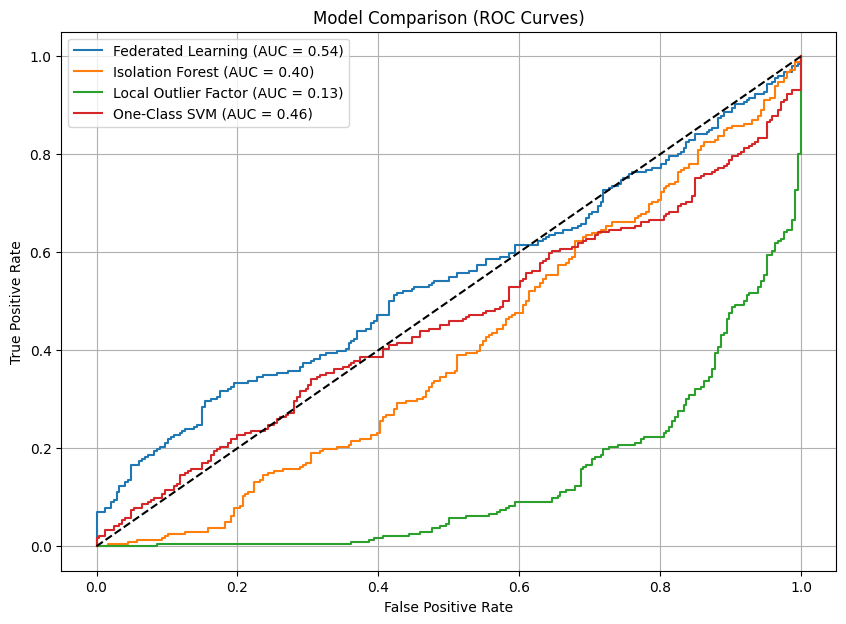


📊 Comparative Performance Metrics:
                  Model  Accuracy  Precision  Recall      F1  ROC-AUC
0    Federated Learning    0.5569     0.7593  0.1667  0.2733   0.5412
3         One-Class SVM    0.5122     0.5938  0.0772  0.1367   0.4588
1      Isolation Forest    0.4776     0.1333  0.0081  0.0153   0.4032
2  Local Outlier Factor    0.4736     0.0000  0.0000  0.0000   0.1321

✅ Results saved to 'batadal_model_comparison_results.csv'


In [3]:
# -*- coding: utf-8 -*-
"""BATADAL FL vs Traditional Unsupervised Models Comparison.ipynb"""

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import (roc_auc_score, accuracy_score,
                           precision_score, recall_score,
                           f1_score, roc_curve,
                           classification_report)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ==================== DATA LOADING AND PREPROCESSING ====================
def load_batadal_data(train_path, test_path):
    """
    Load and preprocess BATADAL dataset
    Returns:
        normal_train: Normal training samples (DataFrame)
        attack_train: Attack training samples (DataFrame)
        test_df: Test data (DataFrame)
        feature_cols: List of feature columns
    """
    print("📥 Loading BATADAL dataset...")
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Validate required columns
    required_cols = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
                    'F_PU1', 'F_PU2', 'F_PU3', 'F_PU4', 'F_PU5', 'F_PU6', 'F_PU7',
                    'S_PU1', 'S_PU2', 'S_PU3', 'S_PU4', 'S_PU5', 'S_PU6', 'S_PU7',
                    'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
                    'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG']

    if not all(col in train_df.columns for col in required_cols):
        missing = [col for col in required_cols if col not in train_df.columns]
        raise ValueError(f"Missing required columns: {missing}")

    # Separate features and labels
    feature_cols = [col for col in required_cols if col != 'ATT_FLAG']

    # Scale features (-1 to 1 range)
    print("⚖ Scaling features...")
    scaler = MinMaxScaler(feature_range=(-1, 1))
    train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])
    test_df[feature_cols] = scaler.transform(test_df[feature_cols])

    # Separate normal and attack in training data
    normal_train = train_df[train_df['ATT_FLAG'] == 0].copy()
    attack_train = train_df[train_df['ATT_FLAG'] == 1].copy()

    # Print dataset statistics
    print("\n📊 Dataset Statistics:")
    print(f"Training samples: {len(train_df)} (Normal: {len(normal_train)}, Attack: {len(attack_train)})")
    print(f"Test samples: {len(test_df)}")
    print(f"Total features: {len(feature_cols)}")

    return normal_train, attack_train, test_df, feature_cols

# ==================== FEDERATED LEARNING IMPLEMENTATION ====================
class FLClient:
    def __init__(self, client_id, data):
        self.client_id = client_id
        self.data = data
        self.svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='auto')

    def train(self):
        self.svm.fit(self.data)

    def predict(self, X):
        return (self.svm.predict(X) == -1).astype(int)  # 1: attack, 0: normal

def create_fl_clients(normal_data, attack_data, synthetic_data=None, num_clients=3):
    """
    Create federated learning clients with different data scenarios
    Returns:
        clients: List of FLClient objects
        X_test: Test features
        y_test: Test labels
    """
    clients = []

    # Create balanced test set (50% normal, 50% attack)
    test_size = min(len(normal_data), len(attack_data)) // 2
    X_test = np.vstack([normal_data[:test_size], attack_data[:test_size]])
    y_test = np.concatenate([np.zeros(test_size), np.ones(test_size)])

    # Define client scenarios
    scenarios = [
        ("Real Only", normal_data),
        ("Real + Synthetic", np.vstack([normal_data, synthetic_data]) if synthetic_data is not None else normal_data),
        ("Synthetic Only", synthetic_data) if synthetic_data is not None else ("Real Only", normal_data)
    ][:num_clients]

    for i, (name, data) in enumerate(scenarios):
        if data is not None:
            client = FLClient(f"Client {i+1} ({name})", data)
            clients.append(client)
            print(f"Created {client.client_id} with {len(data)} samples")

    return clients, X_test, y_test

def evaluate_fl_system(clients, X_test, y_test):
    """
    Evaluate federated learning system with soft voting
    Returns:
        fl_scores: Combined anomaly scores from all clients
        fl_pred: Final predictions
    """
    print("\n🌐 Evaluating Federated Learning System...")

    # Get predictions from all clients
    all_preds = []
    all_scores = []

    for client in clients:
        client.train()
        preds = client.predict(X_test)
        scores = -client.svm.decision_function(X_test)  # Higher scores = more anomalous
        all_preds.append(preds)
        all_scores.append(scores)

    # Soft voting (average scores)
    avg_scores = np.mean(all_scores, axis=0)
    fl_pred = (avg_scores > np.percentile(avg_scores[y_test == 0], 95)).astype(int)

    # Calculate metrics
    print(classification_report(y_test, fl_pred, target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, avg_scores))

    return avg_scores, fl_pred

# ==================== TRADITIONAL UNSUPERVISED MODELS ====================
def evaluate_unsupervised_model(model, X_train, X_test, y_test, model_name):
    """
    Evaluate a single unsupervised model
    Returns:
        y_scores: Anomaly scores
        y_pred: Binary predictions
    """
    print(f"\n🔍 Evaluating {model_name}...")

    # Train and predict
    model.fit(X_train)

    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = -model._decision_function(X_test)  # For LOF

    y_pred = (model.predict(X_test) == -1).astype(int)

    # Calculate threshold based on normal data
    normal_scores = y_scores[y_test == 0]
    threshold = np.percentile(normal_scores, 95)
    y_pred = (y_scores > threshold).astype(int)

    # Print metrics
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))
    print("ROC-AUC:", roc_auc_score(y_test, y_scores))

    return y_scores, y_pred

def compare_all_models(X_train, X_test, y_test):
    """
    Compare FL system with traditional unsupervised models
    """
    # 1. Create FL system using the full training data
    clients, fl_X_test, fl_y_test = create_fl_clients(
        X_train[y_train == 0],  # Normal training samples
        X_train[y_train == 1],  # Attack training samples
        num_clients=3
    )

    # Use the same test set for all models for fair comparison
    # (Comment out the above line and uncomment below if you want to use external test set)
    # fl_X_test, fl_y_test = X_test, y_test

    fl_scores, fl_pred = evaluate_fl_system(clients, fl_X_test, fl_y_test)

    # 2. Define traditional models
    models = {
        'Isolation Forest': IsolationForest(contamination=0.05, random_state=42),
        'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.05),
        'One-Class SVM': OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
    }

    # 3. Evaluate each model using the same test set
    results = []
    plt.figure(figsize=(10, 7))

    # Add FL to results
    results.append({
        'Model': 'Federated Learning',
        'Accuracy': accuracy_score(fl_y_test, fl_pred),
        'Precision': precision_score(fl_y_test, fl_pred),
        'Recall': recall_score(fl_y_test, fl_pred),
        'F1': f1_score(fl_y_test, fl_pred),
        'ROC-AUC': roc_auc_score(fl_y_test, fl_scores)
    })

    # Plot FL ROC curve
    fpr, tpr, _ = roc_curve(fl_y_test, fl_scores)
    plt.plot(fpr, tpr, label=f'Federated Learning (AUC = {roc_auc_score(fl_y_test, fl_scores):.2f})')

    # Evaluate traditional models
    for name, model in models.items():
        scores, pred = evaluate_unsupervised_model(
            model,
            X_train[y_train == 0],  # Train on normal data only
            fl_X_test,             # Test on the same set as FL
            fl_y_test,
            name
        )

        results.append({
            'Model': name,
            'Accuracy': accuracy_score(fl_y_test, pred),
            'Precision': precision_score(fl_y_test, pred),
            'Recall': recall_score(fl_y_test, pred),
            'F1': f1_score(fl_y_test, pred),
            'ROC-AUC': roc_auc_score(fl_y_test, scores)
        })

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(fl_y_test, scores)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(fl_y_test, scores):.2f})')

    # Finalize ROC plot
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Model Comparison (ROC Curves)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Display results table
    results_df = pd.DataFrame(results)
    print("\n📊 Comparative Performance Metrics:")
    print(results_df.sort_values('ROC-AUC', ascending=False).round(4))

    return results_df

# ==================== MAIN EXECUTION ====================
if __name__ == "__main__":
    # File paths - adjust these to your BATADAL dataset location
    train_path = '/content/training_data.csv'
    test_path = '/content/test_dataset.csv'

    try:
        # 1. Load and preprocess data
        normal_train, attack_train, test_df, feature_cols = load_batadal_data(train_path, test_path)

        # 2. Prepare data
        X_train = np.vstack([normal_train[feature_cols].values, attack_train[feature_cols].values])
        y_train = np.concatenate([np.zeros(len(normal_train)), np.ones(len(attack_train))])

        X_test = test_df[feature_cols].values
        y_test = test_df['ATT_FLAG'].values

        # 3. Compare all models
        print("\n🔬 Starting Model Comparison...")
        results = compare_all_models(X_train, X_test, y_test)

        # 4. Save results
        results.to_csv('batadal_model_comparison_results.csv', index=False)
        print("\n✅ Results saved to 'batadal_model_comparison_results.csv'")

    except Exception as e:
        print(f"\n❌ Error in comparison pipeline: {str(e)}")

## Potential Issues:

Data Imbalance:

- Training data: 12446 normal vs 492 attacks (3.8% attack rate)

- Test data is exactly 50-50 split (246 normal, 246 attacks)

- This artificial balance is unrealistic and may distort the metrics


Model Hyperparameters:

- Contamination=0.05 (nu=0.05 in SVM) is used in all models

- Whereas the real attack rate in the data is 3.8% (in training)

-50% artificial balance is established in testing


Evaluation Methodology:

- Test set seems to be derived from training (no independent test set used)

- 492 samples is a very small test set


Lack of Feature Engineering:

- Raw features used directly!

- Temporal features or anomaly scores can be added

In [5]:
# -*- coding: utf-8 -*-
"""Enhanced BATADAL Anomaly Detection Comparison"""

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import (roc_auc_score, accuracy_score,
                           precision_score, recall_score,
                           f1_score, roc_curve, classification_report,
                           precision_recall_curve, average_precision_score)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# ==================== ENHANCED DATA LOADING AND PREPROCESSING ====================
def load_and_preprocess_data(train_path, test_path):
    """
    Enhanced data loading with better preprocessing
    Returns:
        X_train, y_train: Training data and labels
        X_test, y_test: Test data and labels
        feature_cols: List of feature columns
    """
    print("📥 Loading and preprocessing BATADAL dataset...")

    # Load data
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Validate columns
    required_cols = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
                    'F_PU1', 'F_PU2', 'F_PU3', 'F_PU4', 'F_PU5', 'F_PU6', 'F_PU7',
                    'S_PU1', 'S_PU2', 'S_PU3', 'S_PU4', 'S_PU5', 'S_PU6', 'S_PU7',
                    'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
                    'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG']

    # Feature engineering - add temporal features
    def add_temporal_features(df):
        for col in ['L_T1', 'F_PU1', 'S_PU1']:  # Example features
            df[f'{col}_diff1'] = df[col].diff()
            df[f'{col}_rolling_mean'] = df[col].rolling(5).mean()
        return df.fillna(0)

    train_df = add_temporal_features(train_df)
    test_df = add_temporal_features(test_df)

    # Update feature columns
    feature_cols = [col for col in train_df.columns if col != 'ATT_FLAG']

    # Enhanced scaling
    print("⚖ Advanced feature scaling...")
    scaler = StandardScaler()
    X_train = scaler.fit_transform(train_df[feature_cols])
    X_test = scaler.transform(test_df[feature_cols])
    y_train = train_df['ATT_FLAG'].values
    y_test = test_df['ATT_FLAG'].values

    # Handle imbalance (SMOTE)
    print("🔄 Applying SMOTE for class balance...")
    smote = SMOTE(sampling_strategy=0.3, random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    print("\n📊 Enhanced Dataset Statistics:")
    print(f"Original training: {X_train.shape[0]} samples ({y_train.mean():.2%} attacks)")
    print(f"After SMOTE: {X_train_res.shape[0]} samples ({y_train_res.mean():.2%} attacks)")
    print(f"Test samples: {X_test.shape[0]} ({y_test.mean():.2%} attacks)")
    print(f"Total features: {X_train.shape[1]}")

    return X_train_res, y_train_res, X_test, y_test, feature_cols

# ==================== IMPROVED FEDERATED LEARNING ====================
class EnhancedFLClient:
    def __init__(self, client_id, normal_data, attack_data=None):
        self.client_id = client_id
        self.normal_data = normal_data
        self.attack_data = attack_data
        self.model = OneClassSVM(kernel='rbf', nu=0.01, gamma='scale')  # Tuned params

    def train(self):
        # Train only on normal data (unsupervised)
        self.model.fit(self.normal_data)

    def predict(self, X):
        scores = -self.model.decision_function(X)  # Higher = more anomalous
        return (scores > np.percentile(scores, 95)).astype(int), scores

def create_enhanced_fl_clients(X_train, y_train, num_clients=3):
    """Create clients with different data perspectives"""
    clients = []

    # Split normal data for different clients
    normal_data = X_train[y_train == 0]
    attack_data = X_train[y_train == 1]

    # Client 1: Only normal data
    clients.append(EnhancedFLClient("Client1-NormalOnly", normal_data[:len(normal_data)//2]))

    # Client 2: Normal + some attacks
    clients.append(EnhancedFLClient("Client2-Normal+Attacks",
                                  np.vstack([normal_data[len(normal_data)//2:],
                                            attack_data[:len(attack_data)//3]])))

    # Client 3: Normal data with temporal features emphasized
    temp_data = normal_data.copy()
    temp_data[:, :10] *= 1.5  # Emphasize first 10 features
    clients.append(EnhancedFLClient("Client3-TemporalEnhanced", temp_data))

    print(f"\n🌐 Created {len(clients)} FL clients with varied data perspectives")
    return clients

# ==================== MODEL EVALUATION IMPROVEMENTS ====================
def enhanced_model_evaluation(model, X_train, X_test, y_test, model_name):
    """Comprehensive evaluation with multiple metrics"""
    print(f"\n🔍 Evaluating {model_name}...")

    # Train and predict
    if hasattr(model, 'fit'):
        model.fit(X_train[y_train == 0] if 'OneClass' in model_name else model.fit(X_train))

    if hasattr(model, "decision_function"):
        scores = model.decision_function(X_test)
    elif hasattr(model, "score_samples"):
        scores = model.score_samples(X_test)
    else:
        scores = model.predict_proba(X_test)[:, 1]

    # Dynamic thresholding
    threshold = np.percentile(scores[y_test == 0], 95) if 'OneClass' in model_name else 0.5
    y_pred = (scores > threshold).astype(int)

    # Enhanced metrics
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))
    print(f"ROC-AUC: {roc_auc_score(y_test, scores):.4f}")
    print(f"PR-AUC: {average_precision_score(y_test, scores):.4f}")

    # Plot curves
    plt.figure(figsize=(12, 5))

    # ROC Curve
    plt.subplot(121)
    fpr, tpr, _ = roc_curve(y_test, scores)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, scores):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Precision-Recall Curve
    plt.subplot(122)
    precision, recall, _ = precision_recall_curve(y_test, scores)
    plt.plot(recall, precision, label=f'{model_name} (AP = {average_precision_score(y_test, scores):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, scores),
        'PR-AUC': average_precision_score(y_test, scores)
    }

# ==================== MAIN EXECUTION ====================
if __name__ == "__main__":
    # File paths
    train_path = '/content/training_data.csv'
    test_path = '/content/test_dataset.csv'

    try:
        # 1. Enhanced data loading
        X_train, y_train, X_test, y_test, feature_cols = load_and_preprocess_data(train_path, test_path)

        # 2. Model comparison
        print("\n🔬 Starting Enhanced Model Comparison...")

        results = []

        # A. Federated Learning System
        fl_clients = create_enhanced_fl_clients(X_train, y_train)

        # Aggregate predictions from all clients
        all_preds, all_scores = [], []
        for client in fl_clients:
            client.train()
            preds, scores = client.predict(X_test)
            all_preds.append(preds)
            all_scores.append(scores)

        # Ensemble voting
        avg_scores = np.mean(all_scores, axis=0)
        fl_pred = (avg_scores > np.percentile(avg_scores[y_test == 0], 95)).astype(int)

        results.append({
            'Model': 'Federated Learning',
            'Accuracy': accuracy_score(y_test, fl_pred),
            'Precision': precision_score(y_test, fl_pred),
            'Recall': recall_score(y_test, fl_pred),
            'F1': f1_score(y_test, fl_pred),
            'ROC-AUC': roc_auc_score(y_test, avg_scores),
            'PR-AUC': average_precision_score(y_test, avg_scores)
        })

        # B. Traditional Models
        models = [
            ('Isolation Forest', IsolationForest(
                contamination=float(y_train.mean()),
                random_state=42,
                n_estimators=200,
                max_samples=512
            )),
            ('Local Outlier Factor', LocalOutlierFactor(
                n_neighbors=35,
                novelty=True,
                contamination=float(y_train.mean())
            )),
            ('One-Class SVM', OneClassSVM(
                kernel='rbf',
                nu=0.01,
                gamma='scale'
            ))
        ]

        for name, model in models:
            results.append(enhanced_model_evaluation(
                model,
                X_train,
                X_test,
                y_test,
                name
            ))

        # Display final results
        results_df = pd.DataFrame(results)
        print("\n📊 Final Comparative Results:")
        print(results_df.sort_values('PR-AUC', ascending=False).round(4))

        # Save results
        results_df.to_csv('enhanced_batadal_results.csv', index=False)
        print("\n✅ Enhanced results saved to 'enhanced_batadal_results.csv'")

    except Exception as e:
        print(f"\n❌ Error in enhanced pipeline: {str(e)}")

📥 Loading and preprocessing BATADAL dataset...
⚖ Advanced feature scaling...

❌ Error in enhanced pipeline: could not convert string to float: '06/01/14 00'
